In [66]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

In [67]:
# CREATING DATA AND TRAIN TEST SPLIT

# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Lesson 47+48+49 - Building Training Loop

- Training loop is learning the parameters

Things which we need in a training loop:
1. **Loop through the data** - *we want to loop through the data multiple times (starts with random params & then minimize loss)*
2. **Forward pass** - *move data through the model using the model's `forward()` function to make predictions*
3. **Calculate the loss** - *Compare forward pass predicitons to ground truth labels*
4. Optimizer zero grad
5. Loss Backward - *move backwards through the network to calculate the gradients of each of the parameters of our model wrt loss.*
6. **Optimizer step** - *use the optimizer to adjust our model's parameters to try to improve the loss (**gradient descent**)*


## Epoch
- An epoch is 1 loop through the data

In [68]:
# Creating a linear regression model class
class LinearRegressionModel(nn.Module):
  # Creating constructor
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                            dtype = torch.float), # <- PyTorch loves float32 by default
                                            requires_grad = True) # by default is also true
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype = torch.float), # <- PyTorch loves float32 by default
                                          requires_grad = True)

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula


torch.manual_seed(42) # we'll get the same initial values when using seed
model_0 = LinearRegressionModel() # calling the class

In [69]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [ ]:
epochs = 1 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop

- `optimizer.zero_grad()` because we want to start fresh in each iteration in the loop
- `model.train()`sets up a whole bunch of setting behind the scenes so that it can track gradients and more

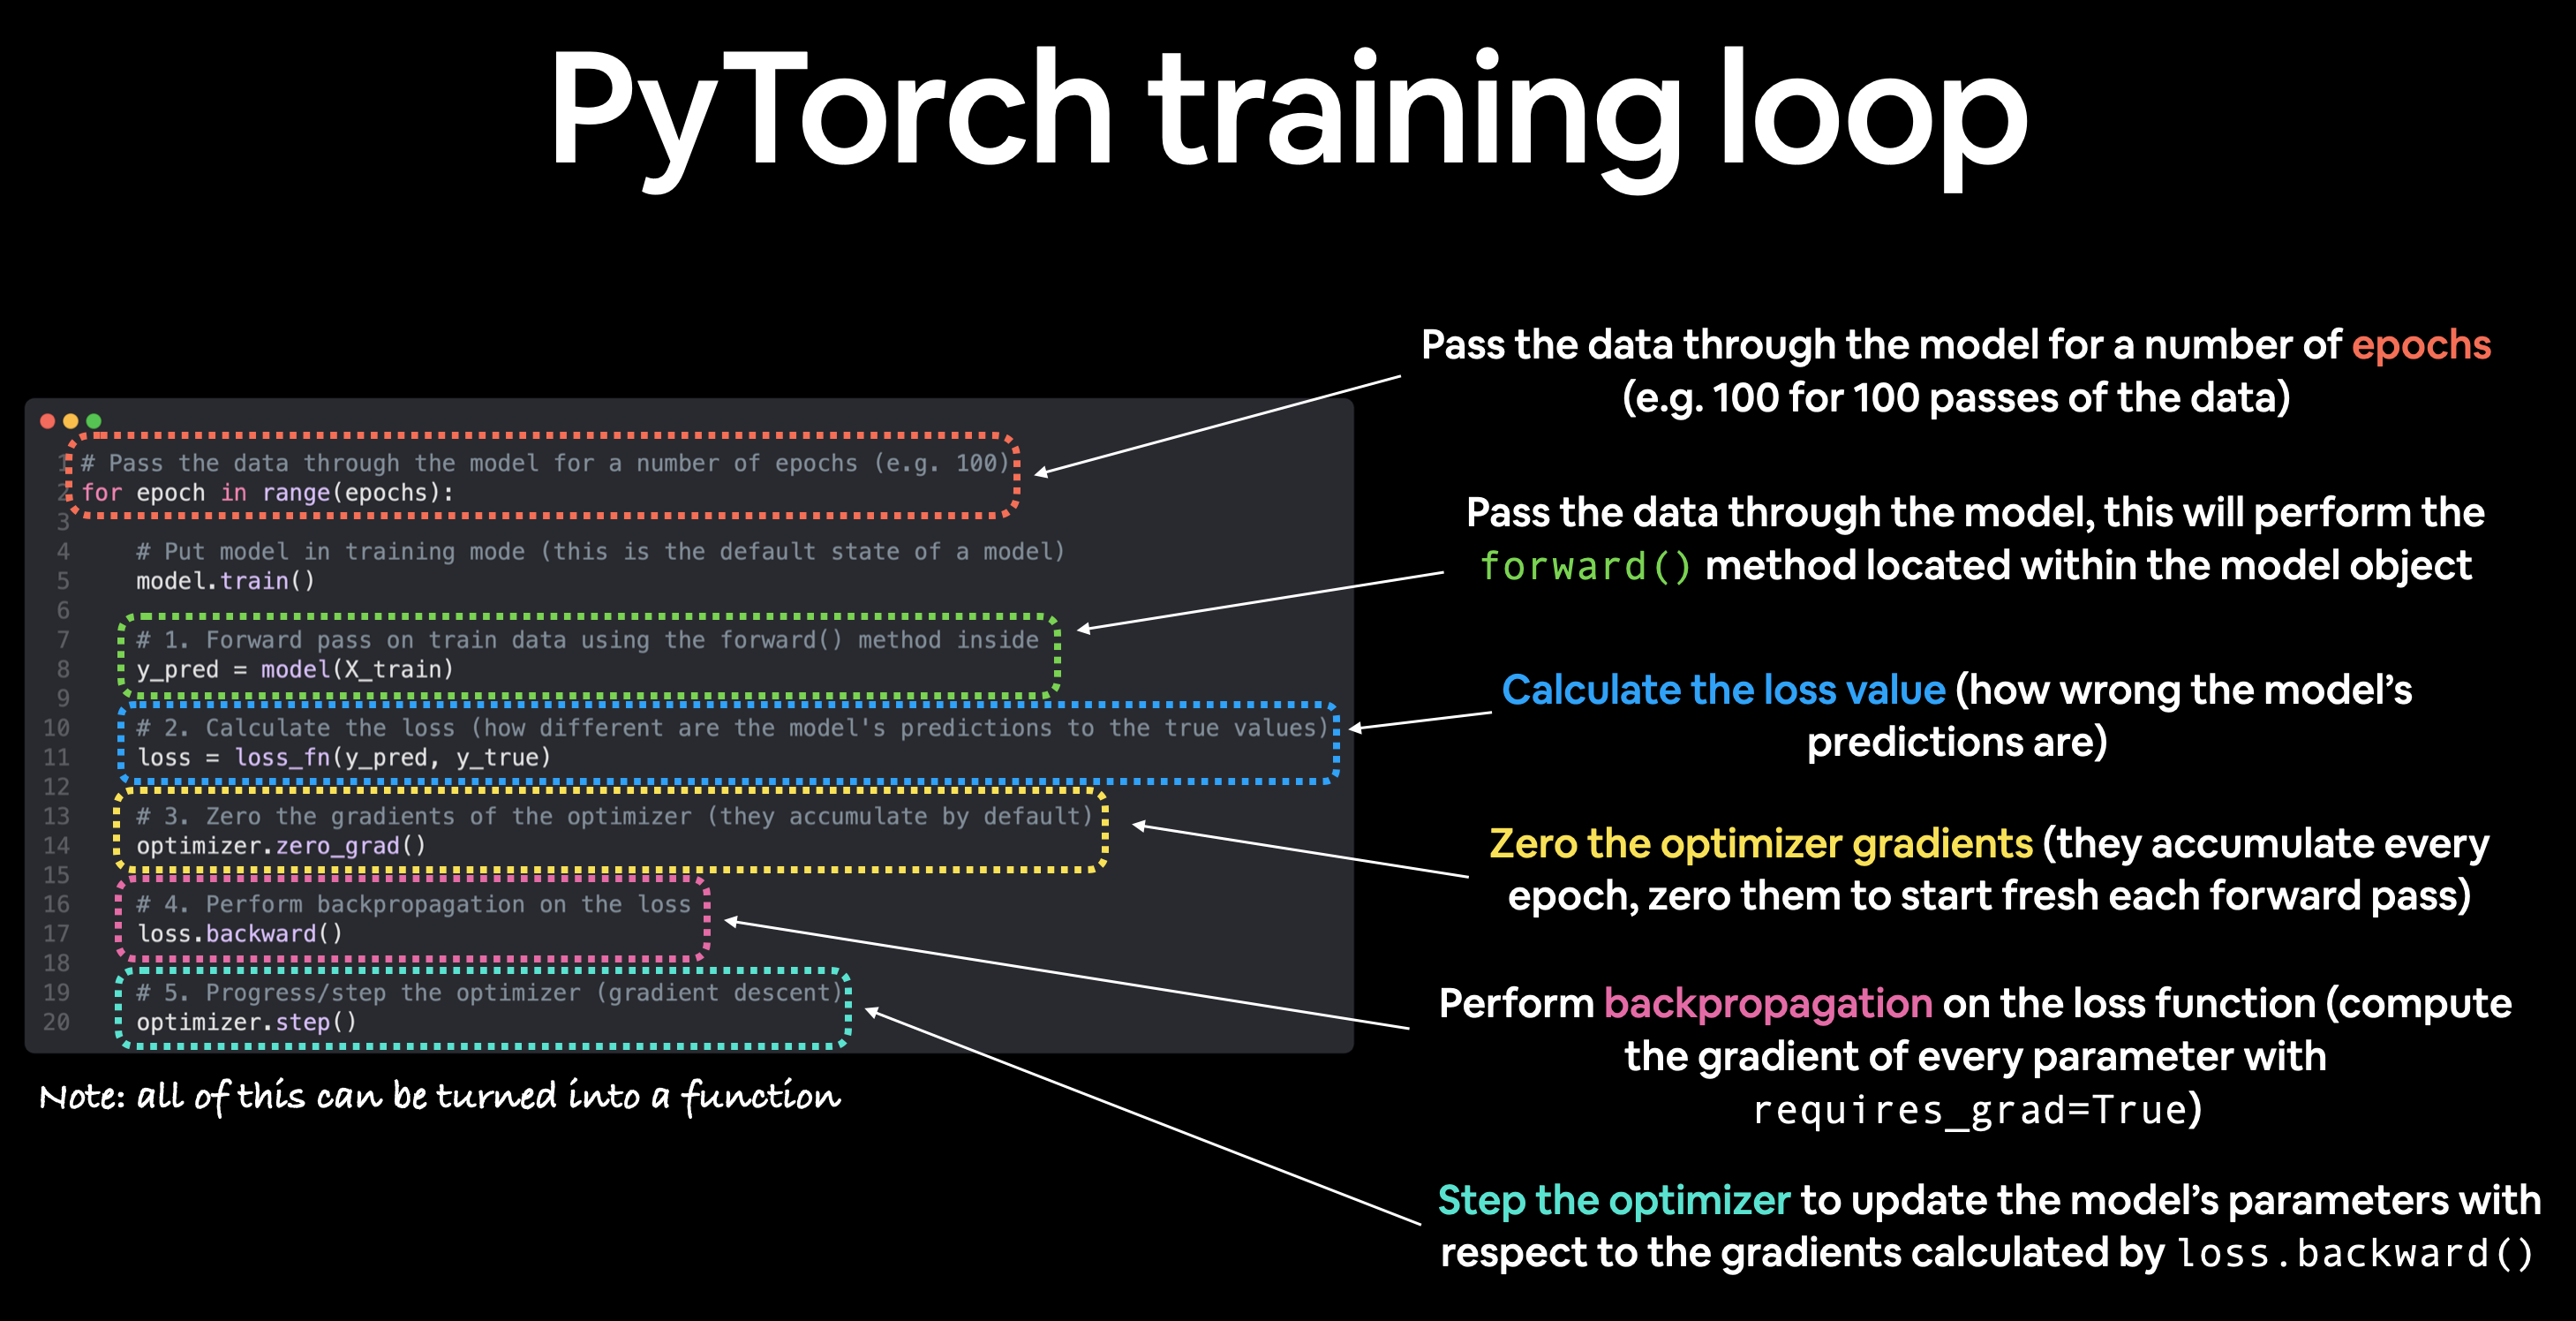

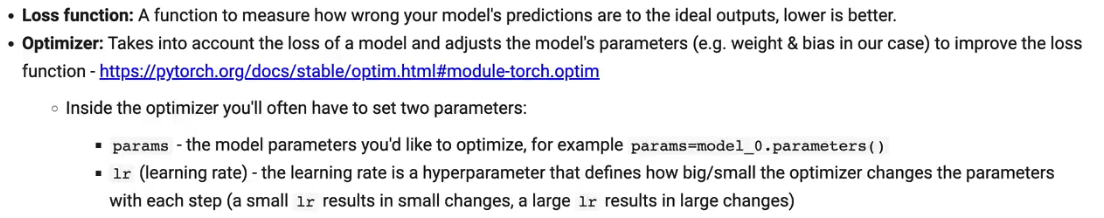

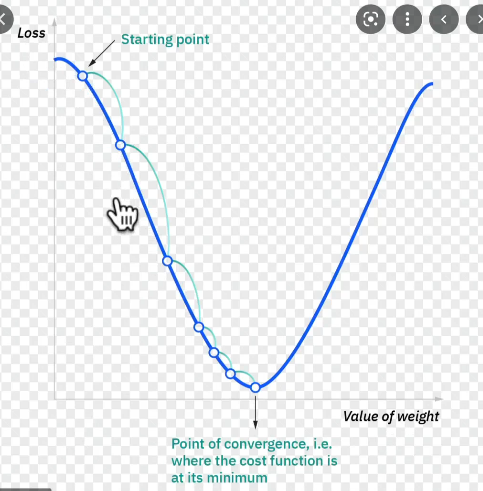

- A curve is made for every parameter - pytorch does this using `autograd`

- `Learning rate scheduling` says start with big steps and as we get closer and closer to the bottom - reduce the step size

# Lesson 50 - Training

In [70]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [71]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.001)

In [72]:
weight, bias # true values

(0.7, 0.3)

In [73]:
epochs = 1 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels
  print(f"Loss: {loss}")

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop

Loss: 0.31288138031959534


In [74]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])

In [75]:
epochs = 1 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels
  print(f"Loss: {loss}")

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop

Loss: 0.3117292523384094


In [76]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3375])), ('bias', tensor([0.1308]))])

In [77]:
epochs = 1 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels
  print(f"Loss: {loss}")

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop

Loss: 0.3105771541595459


In [78]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3379])), ('bias', tensor([0.1318]))])

In [79]:
epochs = 1 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels
  print(f"Loss: {loss}")

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop

Loss: 0.3094250559806824


In [80]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3383])), ('bias', tensor([0.1328]))])

In [81]:
epochs = 1 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels
  print(f"Loss: {loss}")

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop

Loss: 0.30827295780181885


In [82]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3386])), ('bias', tensor([0.1338]))])

In [83]:
epochs = 1 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels
  print(f"Loss: {loss}")

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop

Loss: 0.3071208596229553


In [84]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3390])), ('bias', tensor([0.1348]))])

In [85]:
epochs = 1 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels
  print(f"Loss: {loss}")

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop

Loss: 0.3059687614440918


In [86]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3394])), ('bias', tensor([0.1358]))])

In [87]:
epochs = 1 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels
  print(f"Loss: {loss}")

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop

Loss: 0.3048166334629059


In [88]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.1368]))])

## Running it ~ 20 more times

In [89]:
epochs = 1 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels
  print(f"Loss: {loss}")

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop

Loss: 0.30366456508636475


In [90]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3402])), ('bias', tensor([0.1378]))])

## Making Predictions

In [91]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [92]:
y_preds_new[:10]

tensor([[0.4100],
        [0.4168],
        [0.4236],
        [0.4304],
        [0.4372],
        [0.4440],
        [0.4508],
        [0.4576],
        [0.4644],
        [0.4712]])

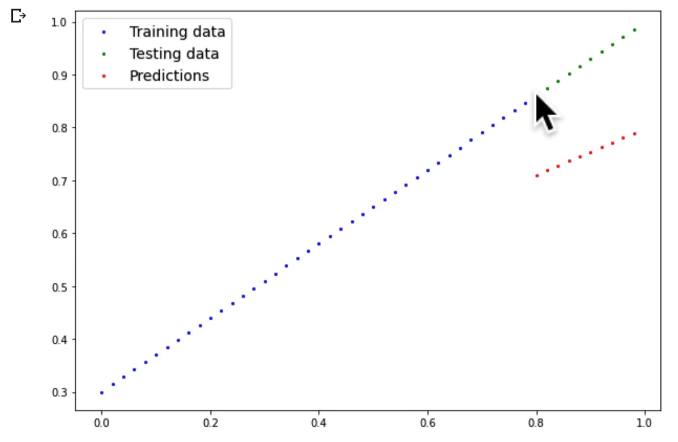

- So more epochs can take us closer to true values

### Running it for 100 Epochs

In [93]:
epochs = 100 # hyperparameter

# 1. Loop through the data
for epoch in range(epochs):
  # setting the model in training mode
  model_0.train()  # ----->>>>>>> train mode in PyTorch sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train) # predictions, labels
  print(f"Loss: {loss}")

  # 4. Optimizer 0 grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  optimizer.step()                  # it accumilates the value that it's supposed to change through the loop

Loss: 0.3025124669075012
Loss: 0.3013603389263153
Loss: 0.30020827054977417
Loss: 0.29905614256858826
Loss: 0.2979040741920471
Loss: 0.2967519462108612
Loss: 0.29559987783432007
Loss: 0.29444774985313416
Loss: 0.293295681476593
Loss: 0.2921435832977295
Loss: 0.2909914553165436
Loss: 0.28983938694000244
Loss: 0.28868725895881653
Loss: 0.287535160779953
Loss: 0.2863830626010895
Loss: 0.28523099422454834
Loss: 0.2840788662433624
Loss: 0.2829267382621765
Loss: 0.281774640083313
Loss: 0.28062254190444946
Loss: 0.2794705033302307
Loss: 0.2783183455467224
Loss: 0.2771662771701813
Loss: 0.27601414918899536
Loss: 0.2748620808124542
Loss: 0.2737099528312683
Loss: 0.2725578844547272
Loss: 0.27140578627586365
Loss: 0.2702536880970001
Loss: 0.2691015899181366
Loss: 0.26794949173927307
Loss: 0.26679736375808716
Loss: 0.265645295381546
Loss: 0.2644931674003601
Loss: 0.2633410692214966
Loss: 0.26218897104263306
Loss: 0.26103687286376953
Loss: 0.259884774684906
Loss: 0.2587326467037201
Loss: 0.25758057

In [94]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3792])), ('bias', tensor([0.2378]))])

In [95]:
weight, bias

(0.7, 0.3)